In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets, linear_model, metrics



### Reading the data

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


No need for the ID attribute since it's a sequential numbering of the data and the data is already indexed.

In [3]:
df.drop(columns=['Id'], inplace = True)

In [4]:
dict(df.dtypes)

{'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinType2': dtype('O'),
 'BsmtFinSF2': dtype('int64'),

### Check for duplicates

In [5]:
df.duplicated().sum()

0

### Checking for nulls

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [7]:
for col in df:
    if (df[col].isnull().sum() > 0):
        print(col,":", df[col].isnull().sum())

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


Alley, PoolQC, Fence, MiscFeature features have more than 93% null values. Therefore, it's difficult to find an appropriate imputing strategy, so they will be dropped.

In [8]:
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)

We will the check most frequent values for categorical kinds of data

In [9]:
print("MasVnrType:", df.MasVnrType.mode()[0])
#print('MasVnrArea:', df.MasVnrArea.mode()[0])
print("BsmtQual:",df.BsmtQual.mode()[0])
print("BsmtCond:", df.BsmtCond.mode()[0])
print("BsmtExposure:", df.BsmtExposure.mode()[0])
print("BsmtFinType1:", df.BsmtFinType1.mode()[0])
print("BsmtFinType2:", df.BsmtFinType2.mode()[0])
print("Electrical:", df.Electrical.mode()[0])
print("FireplaceQu:", df.FireplaceQu.mode()[0])
print("GarageType:", df.GarageType.mode()[0])
print("FireplaceQu:", df.FireplaceQu.mode()[0])
#print("GarageYrBlt", df.GarageYrBlt.mode()[0])
print("GarageFinish:", df.GarageFinish.mode()[0])
print("GarageQual:", df.GarageQual.mode()[0])
print("GarageCond:", df.GarageCond.mode()[0])


MasVnrType: None
BsmtQual: TA
BsmtCond: TA
BsmtExposure: No
BsmtFinType1: Unf
BsmtFinType2: Unf
Electrical: SBrkr
FireplaceQu: Gd
GarageType: Attchd
FireplaceQu: Gd
GarageFinish: Unf
GarageQual: TA
GarageCond: TA


In [10]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)


In [11]:
cols = []
for col in df:
    if (df[col].isnull().sum() > 0):
        print(col,":", df[col].isnull().sum())
        cols.append(col)

LotFrontage : 259
MasVnrArea : 8
GarageYrBlt : 81


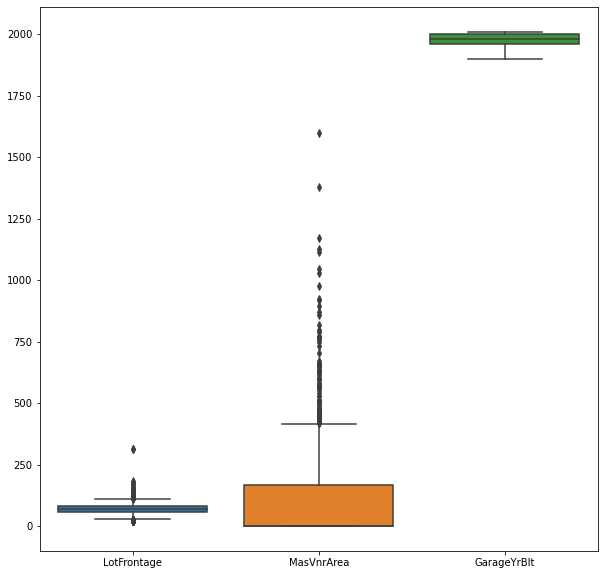

In [12]:
temp = df[cols]
fig = plt.figure(figsize =(10, 10))
sns.boxplot(data = temp)
plt.show()

In [13]:
df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [14]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [15]:
yrMean = df.GarageYrBlt.value_counts().iloc[:5].index.to_numpy().mean() # mean of the 5 highest common dates

In [16]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(yrMean)

In [17]:
# since the number of missing values for "MasVnrArea" is just 8, we can drop these rows
df = df[df['MasVnrArea'].notna()]

In [18]:
cols = []
for col in df:
    if (df[col].isnull().sum() > 0):
        print(col,":", df[col].isnull().sum())
        cols.append(col)

LotFrontage : 257


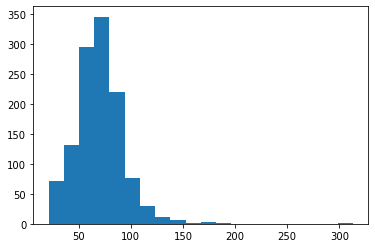

In [19]:
temp = df[cols]
mu, sigma = 0.5, 0.1
for i in range(len(temp.columns)):
    #count, bins, ignored = plt.hist(temp[temp.columns[i]], 20)
    plt.hist(temp[temp.columns[i]], bins=20)
    plt.show()

In [20]:
df.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [21]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [22]:
topValues = df.LotFrontage.value_counts().iloc[:5]
topValues

60.0    143
70.0     70
80.0     69
50.0     57
75.0     52
Name: LotFrontage, dtype: int64

In [23]:
weights = topValues.values / topValues.values.sum() # probability of each unique value
weights

array([0.3657289 , 0.17902813, 0.17647059, 0.14578005, 0.13299233])

In [24]:
lotFrontageWeightedAvg = np.average(list(topValues.index), weights=list(weights)).round()
lotFrontageWeightedAvg

66.0

In [25]:
df['LotFrontage'] = df['LotFrontage'].fillna(lotFrontageWeightedAvg) # don't know why this warning shows up here but not in when imputing GarageYrBlt...

C:\Users\Farah\AppData\Local\Temp\ipykernel_3012\3137708121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotFrontage'] = df['LotFrontage'].fillna(lotFrontageWeightedAvg) # don't know why this warning shows up here but not in when imputing GarageYrBlt...


In [26]:
cols = ['']
for col in df:
    if (df[col].isnull().sum() > 0):
        print(col,":", df[col].isnull().sum())
        cols.append(col)
cols

['']

In [27]:
colsObjs = df.select_dtypes(['object']).columns # selects the columns that have dtype('object')
colsObjs

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
dfObj = df[colsObjs] # selects the columns that have dtype('object')
dfObj.head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [29]:
uniqueValsDict= {}
maxLen = 0
for colName in dfObj:
    uniqueValsDict.update({colName : list(dfObj[colName].unique())})
    maxLen = max(maxLen, len(dfObj[colName].unique()))

for key, val in uniqueValsDict.items():
    uniqueValsDict[key] += [np.nan] * (maxLen - len(val)) #padding the lists to make them have equal lengths 
pd.DataFrame(uniqueValsDict)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RM,Grvl,IR1,Bnk,NoSeWa,FR2,Mod,Veenker,Feedr,Artery,...,TA,Min1,TA,Detchd,Unf,Fa,Fa,N,New,Abnorml
2,C (all),NaN,IR2,Low,NaN,Corner,Sev,Crawfor,PosN,RRNn,...,Ex,Maj1,Fa,BuiltIn,Fin,Gd,Gd,P,COD,Partial
3,FV,NaN,IR3,HLS,NaN,CulDSac,NaN,NoRidge,Artery,Feedr,...,Fa,Min2,Ex,CarPort,NaN,Ex,Po,NaN,ConLD,AdjLand
4,RH,NaN,NaN,NaN,NaN,FR3,NaN,Mitchel,RRAe,PosN,...,NaN,Mod,Po,Basment,NaN,Po,Ex,NaN,ConLI,Alloca
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somerst,RRNn,PosA,...,NaN,Maj2,NaN,2Types,NaN,NaN,NaN,NaN,CWD,Family
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWAmes,RRAn,RRAn,...,NaN,Sev,NaN,NaN,NaN,NaN,NaN,NaN,ConLw,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OldTown,PosA,RRAe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Con,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BrkSide,RRNe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oth,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sawyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Following the `data_description.txt` file, each feature's values can be classified as either categorical or ordinal values. We can deduce that most of the columns are ordinal, and the categorical features, like Neighborhood, have a lot of unique values, which could cause "the curse of dimensionality" problem. Therefore, we'll apply ordinal conversion to all features that are strings|

In [30]:
le = preprocessing.LabelEncoder()
dfObjEncoded = dfObj.copy()
for col in dfObj:
    colEncoded = le.fit_transform(dfObj[col])
    dfObjEncoded[col] = pd.Series(colEncoded, name=col)
dfObjEncoded.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0


In [31]:
for colName in dfObjEncoded:
    df[colName] = dfObjEncoded[colName]
df.head()

C:\Users\Farah\AppData\Local\Temp\ipykernel_3012\1779059403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colName] = dfObjEncoded[colName]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


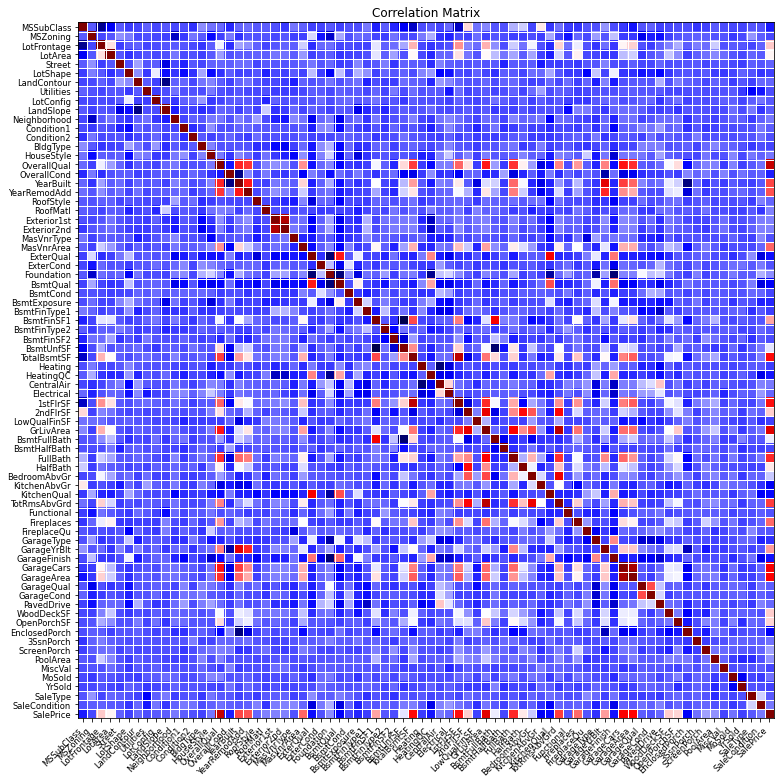

In [32]:
import statsmodels.api as sm
correlation= df.corr()
N, M = 11, 11
fig, ax = plt.subplots(figsize=(N, M))
sm.graphics.plot_corr(correlation, xnames=list(correlation.columns), cmap='seismic', ax=ax)
plt.show()

Noting that `seismic` color-map is this: (left and right are -1, 1 respectively) <br>
<img src="seismicCmap.png" width="400" />

In [33]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1452.000000,1444.000000,1452.000000,1452.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1444.000000,1444.000000,1452.000000
mean,56.949036,3.031163,69.316804,10507.276171,0.995845,1.939058,2.774931,0.000693,3.022161,0.063019,...,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,7.511773,3.767313,180615.063361
std,42.340097,0.627173,22.087138,9989.563592,0.064348,1.409953,0.711188,0.026316,1.620916,0.277681,...,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,1.558470,1.104334,79285.541485
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7538.750000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129900.000000
50%,50.000000,3.000000,66.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,162700.000000
75%,70.000000,3.000000,79.000000,11600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


<AxesSubplot:>

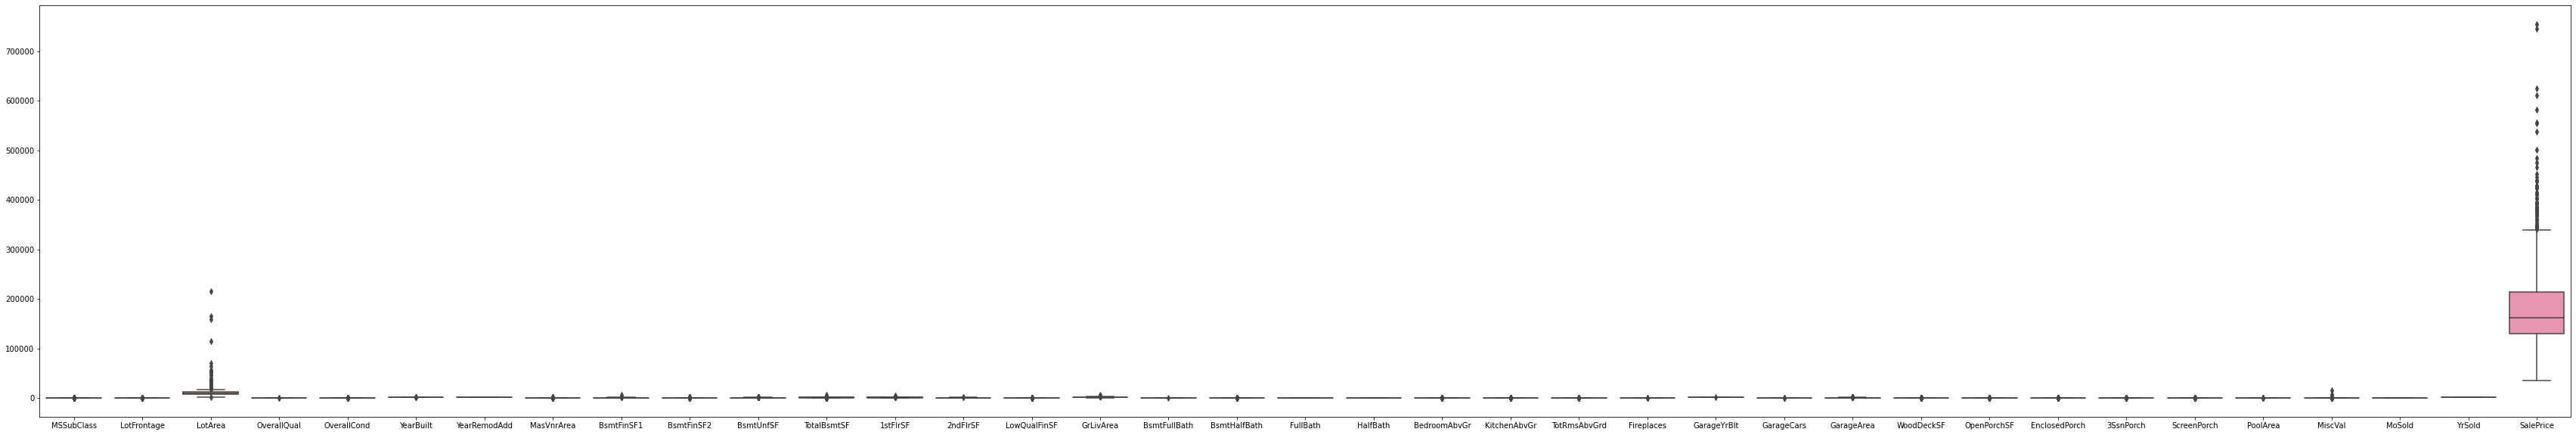

In [34]:
#boxplot
fig = plt.figure(figsize =(60, 10))
dfwoPrevObjs = df.loc[:, ~df.columns.isin(list(colsObjs))] # excluding columns that were once discrete features
sns.boxplot(data=dfwoPrevObjs) 

<AxesSubplot:>

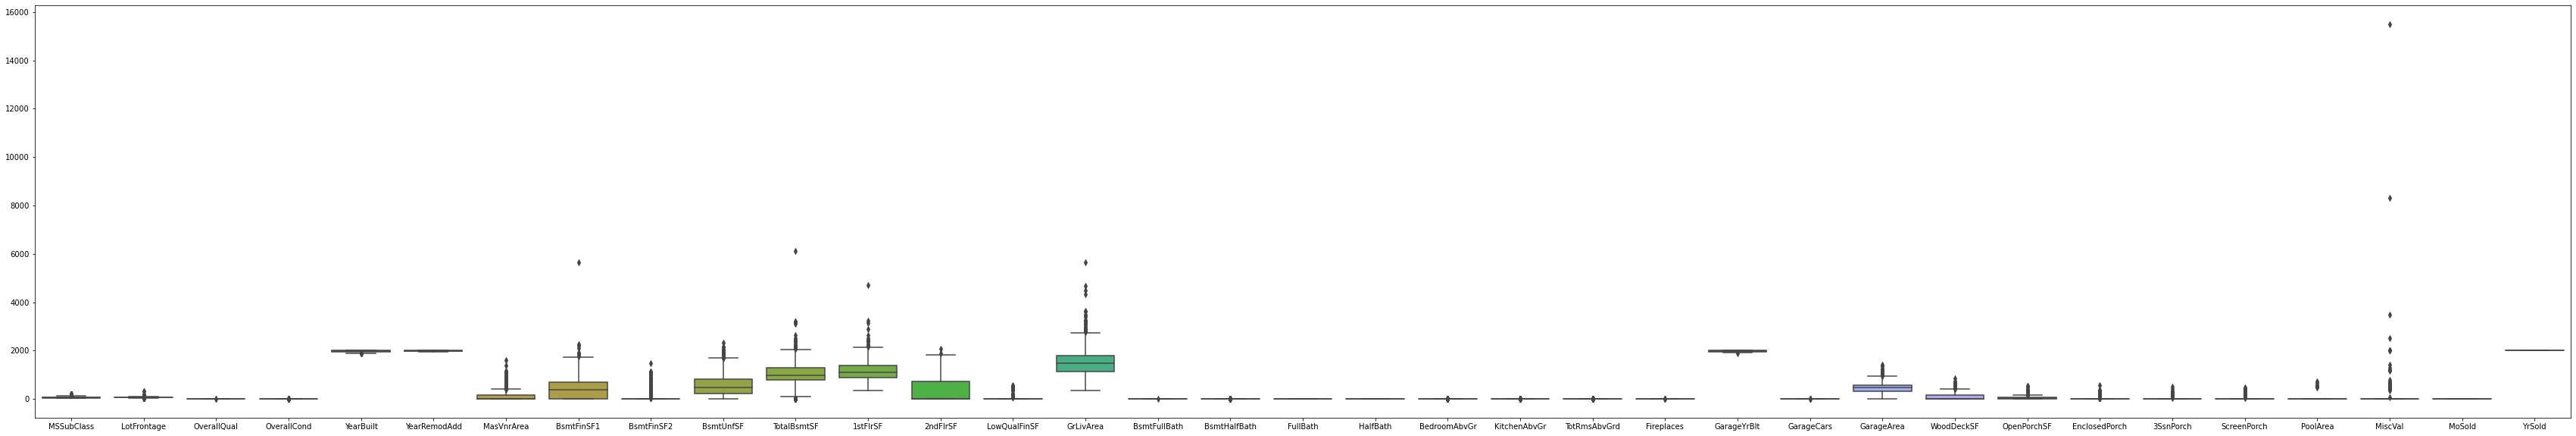

In [35]:
# neglecting SalePrice and LotArea:
fig = plt.figure(figsize =(60, 10))
sns.boxplot(data=dfwoPrevObjs.loc[:, ~dfwoPrevObjs.columns.isin(['LotArea', 'SalePrice'])])

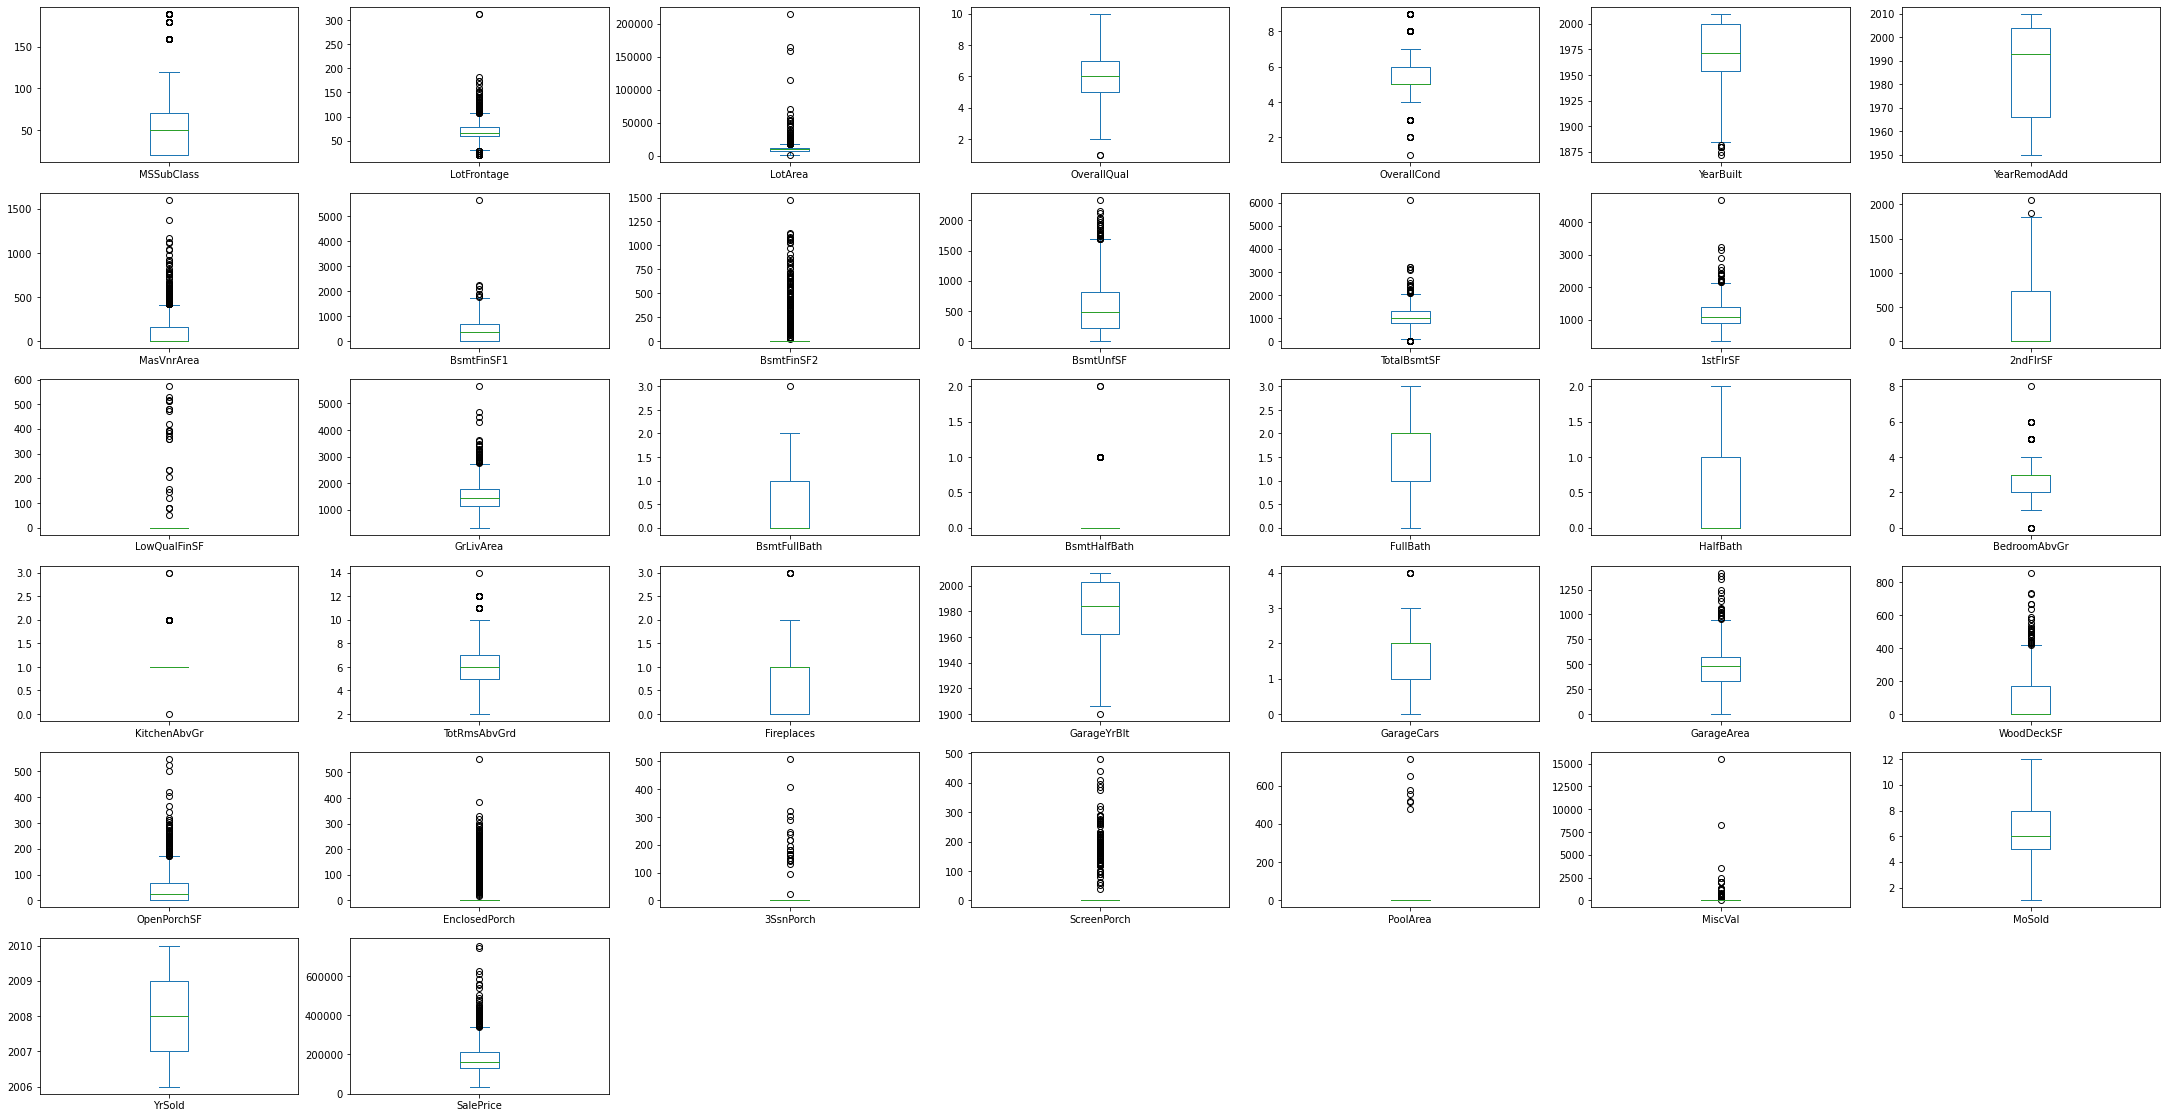

In [36]:
column_names = dfwoPrevObjs.columns.tolist()
fig, axs = plt.subplots(1, len(column_names), figsize=(38, 20))
for i in range(len(column_names)):
    col = column_names[i]
    plt.subplot(6, 7, i+1)
    dfwoPrevObjs[col].plot(kind='box')
plt.show()

As we can see from the boxplots, there are lots of features that have outliers spanning over many examples in the dataset. Therefore, removing the outliers entirely is not suggested, and therefore, standardization will be used on the dataset, as the features' values don't get affected by the outliers when performing standardization instead of normalization

### standradizing the Data

We will now standradize the continuous valued features and not the discrete ones so we will be splitting the features.

In [37]:
temp = df.drop(columns= colsObjs)
temp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [38]:
scaler = StandardScaler()
scaler.fit(temp)
std_only_df = pd.DataFrame(scaler.transform(temp), columns=temp.columns.values)
std_only_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.072083,-0.195512,-0.206014,0.656877,-0.520512,1.056331,0.882742,0.510015,0.580026,-0.289513,...,-0.753221,0.221269,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,-1.600089,0.138937,0.351824
1,-0.872973,0.483851,-0.090854,-0.067334,2.175506,0.161798,-0.425058,-0.572835,1.177561,-0.289513,...,1.624112,-0.702611,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,-0.488448,-0.613809,0.011165
2,0.072083,-0.059639,0.074376,0.656877,-0.520512,0.990069,0.834305,0.322174,0.096725,-0.289513,...,-0.753221,-0.066497,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,0.993739,0.138937,0.541079
3,0.308347,-0.421966,-0.095861,0.656877,-0.520512,-1.859183,-0.715681,-0.572835,-0.496416,-0.289513,...,-0.753221,-0.172516,4.094767,-0.116664,-0.271006,-0.068882,-0.087931,-1.600089,-1.366555,-0.512440
4,0.072083,0.665014,0.375794,1.381088,-0.520512,0.956938,0.737431,1.360826,0.467988,-0.289513,...,0.778484,0.569618,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,2.105380,0.138937,0.875429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.072083,-0.331384,-0.259388,-0.067334,-0.520512,0.923807,0.737431,-0.572835,-0.970929,-0.289513,...,-0.753221,-0.096788,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,0.623192,-0.613809,-0.070845
1448,-0.872973,0.710305,0.267143,-0.067334,0.378160,0.228060,0.156186,0.084610,0.764558,0.718710,...,2.030972,-0.702611,-0.359223,-0.116664,-0.271006,-0.068882,-0.087931,-1.600089,1.644429,0.370749
1449,0.308347,-0.150221,-0.146731,0.656877,3.074178,-0.997781,1.028053,-0.572835,-0.366804,-0.289513,...,-0.753221,0.206124,-0.359223,-0.116664,-0.271006,-0.068882,4.939146,-0.488448,1.644429,1.083609
1450,-0.872973,-0.059639,-0.079137,-0.791545,0.378160,-0.699604,0.543683,-0.572835,-0.863285,6.075283,...,2.166591,-0.702611,1.474773,-0.116664,-0.271006,-0.068882,-0.087931,-0.858995,1.644429,-0.485629


In [39]:
std_only_df.columns.values[:-1]

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [40]:
discrete_only_df = df.drop(columns=std_only_df.columns.values[:-1])
discrete_only_df['SalePrice'] = std_only_df['SalePrice']
discrete_only_df.head() # contains discrete features only (and SalePrice)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.351824
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.011165
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.541079
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0,-0.512440
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.875429


In [41]:
std_df = pd.concat([std_only_df, discrete_only_df], axis = 1)
std_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,0.072083,-0.195512,-0.206014,0.656877,-0.520512,1.056331,0.882742,0.510015,0.580026,-0.289513,...,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.351824
1,-0.872973,0.483851,-0.090854,-0.067334,2.175506,0.161798,-0.425058,-0.572835,1.177561,-0.289513,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.011165
2,0.072083,-0.059639,0.074376,0.656877,-0.520512,0.990069,0.834305,0.322174,0.096725,-0.289513,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.541079
3,0.308347,-0.421966,-0.095861,0.656877,-0.520512,-1.859183,-0.715681,-0.572835,-0.496416,-0.289513,...,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0,-0.512440
4,0.072083,0.665014,0.375794,1.381088,-0.520512,0.956938,0.737431,1.360826,0.467988,-0.289513,...,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0,0.875429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# since some values could not be standardized, they are set to NaN. Since then NaN values are not much:
std_df.isna().sum()

MSSubClass        8
LotFrontage       8
LotArea           8
OverallQual       8
OverallCond       8
                 ..
GarageCond       16
PavedDrive       16
SaleType         16
SaleCondition    16
SalePrice        16
Length: 77, dtype: int64

In [43]:
dict(std_df.isna().sum())

{'MSSubClass': 8,
 'LotFrontage': 8,
 'LotArea': 8,
 'OverallQual': 8,
 'OverallCond': 8,
 'YearBuilt': 8,
 'YearRemodAdd': 8,
 'MasVnrArea': 8,
 'BsmtFinSF1': 8,
 'BsmtFinSF2': 8,
 'BsmtUnfSF': 8,
 'TotalBsmtSF': 8,
 '1stFlrSF': 8,
 '2ndFlrSF': 8,
 'LowQualFinSF': 8,
 'GrLivArea': 8,
 'BsmtFullBath': 8,
 'BsmtHalfBath': 8,
 'FullBath': 8,
 'HalfBath': 8,
 'BedroomAbvGr': 8,
 'KitchenAbvGr': 8,
 'TotRmsAbvGrd': 8,
 'Fireplaces': 8,
 'GarageYrBlt': 8,
 'GarageCars': 8,
 'GarageArea': 8,
 'WoodDeckSF': 8,
 'OpenPorchSF': 8,
 'EnclosedPorch': 8,
 '3SsnPorch': 8,
 'ScreenPorch': 8,
 'PoolArea': 8,
 'MiscVal': 8,
 'MoSold': 8,
 'YrSold': 8,
 'SalePrice': SalePrice     8
 SalePrice    16
 dtype: int64,
 'MSZoning': 16,
 'Street': 16,
 'LotShape': 16,
 'LandContour': 16,
 'Utilities': 16,
 'LotConfig': 16,
 'LandSlope': 16,
 'Neighborhood': 16,
 'Condition1': 16,
 'Condition2': 16,
 'BldgType': 16,
 'HouseStyle': 16,
 'RoofStyle': 16,
 'RoofMatl': 16,
 'Exterior1st': 16,
 'Exterior2nd': 16,
 

In [44]:
# Therefore, we'll just remove NaN rows
std_df.dropna(inplace=True)

std_df.isna().sum(), len(std_df)

(MSSubClass       0
 LotFrontage      0
 LotArea          0
 OverallQual      0
 OverallCond      0
                 ..
 GarageCond       0
 PavedDrive       0
 SaleType         0
 SaleCondition    0
 SalePrice        0
 Length: 77, dtype: int64,
 1444)

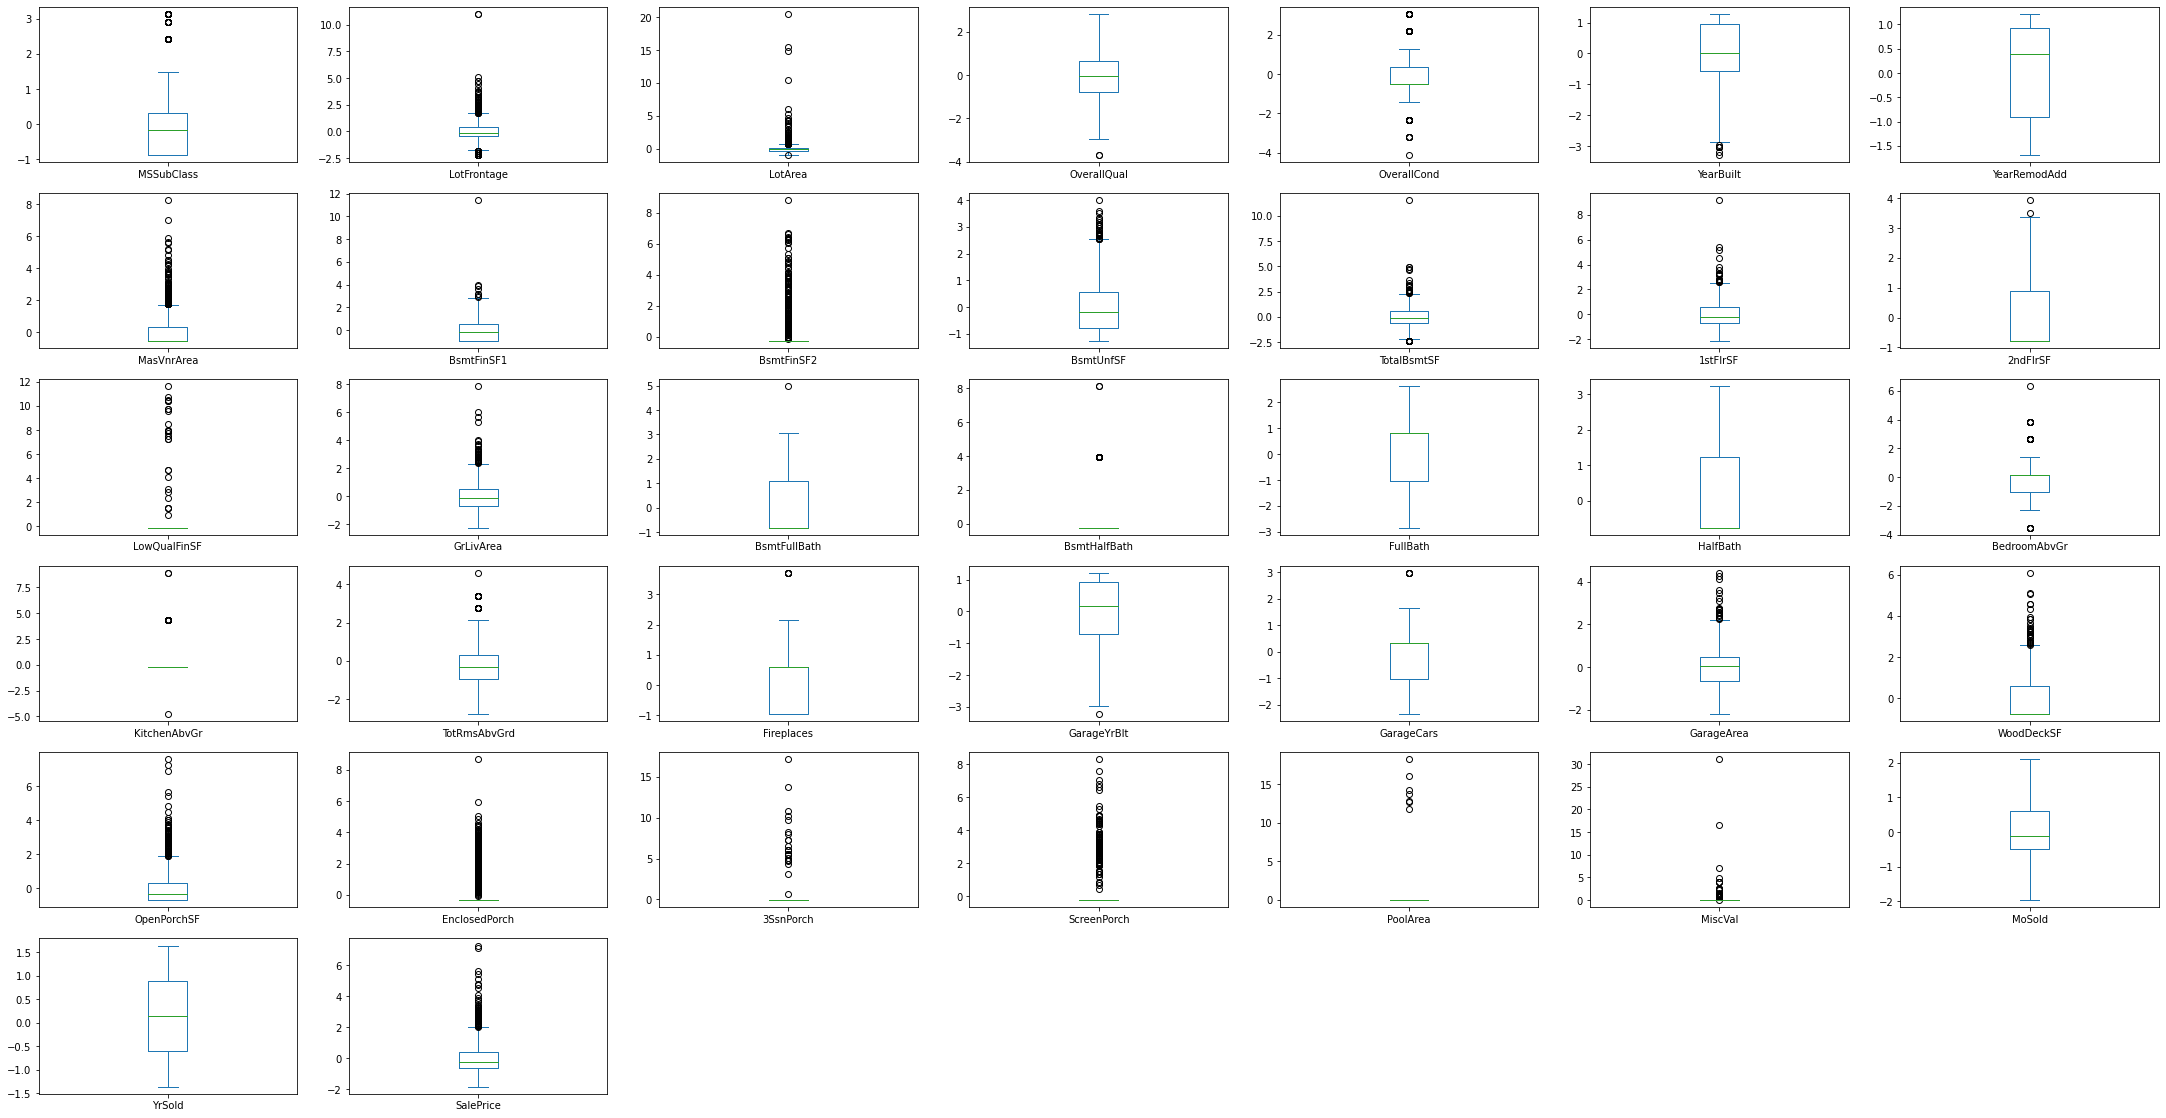

In [45]:
column_names = std_only_df.columns.tolist() # checking the standardized values of non-discrete features
fig, axs = plt.subplots(1, len(column_names), figsize=(38, 20))
for i in range(len(column_names)):
    col = column_names[i]
    plt.subplot(6, 7, i+1)
    std_only_df[col].plot(kind='box')
plt.show()

In [46]:
std_df.shape

(1444, 77)

In [47]:
std_df = std_df.loc[:,~std_df.columns.duplicated()]
std_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.072083,-0.195512,-0.206014,0.656877,-0.520512,1.056331,0.882742,0.510015,0.580026,-0.289513,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,-0.872973,0.483851,-0.090854,-0.067334,2.175506,0.161798,-0.425058,-0.572835,1.177561,-0.289513,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,0.072083,-0.059639,0.074376,0.656877,-0.520512,0.990069,0.834305,0.322174,0.096725,-0.289513,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,0.308347,-0.421966,-0.095861,0.656877,-0.520512,-1.859183,-0.715681,-0.572835,-0.496416,-0.289513,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,0.072083,0.665014,0.375794,1.381088,-0.520512,0.956938,0.737431,1.360826,0.467988,-0.289513,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.072083,-0.331384,-0.259388,-0.067334,-0.520512,0.923807,0.737431,-0.572835,-0.970929,-0.289513,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1448,-0.872973,0.710305,0.267143,-0.067334,0.378160,0.228060,0.156186,0.084610,0.764558,0.718710,...,3.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
1449,0.308347,-0.150221,-0.146731,0.656877,3.074178,-0.997781,1.028053,-0.572835,-0.366804,-0.289513,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1450,-0.872973,-0.059639,-0.079137,-0.791545,0.378160,-0.699604,0.543683,-0.572835,-0.863285,6.075283,...,2.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0


### Splitting the Data

In [48]:
X = std_df.iloc[:,:-1]
y = pd.DataFrame(data=std_df['SalePrice'])
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,0.072083,-0.195512,-0.206014,0.656877,-0.520512,1.056331,0.882742,0.510015,0.580026,-0.289513,...,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0
1,-0.872973,0.483851,-0.090854,-0.067334,2.175506,0.161798,-0.425058,-0.572835,1.177561,-0.289513,...,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0
2,0.072083,-0.059639,0.074376,0.656877,-0.520512,0.990069,0.834305,0.322174,0.096725,-0.289513,...,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0
3,0.308347,-0.421966,-0.095861,0.656877,-0.520512,-1.859183,-0.715681,-0.572835,-0.496416,-0.289513,...,4.0,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0
4,0.072083,0.665014,0.375794,1.381088,-0.520512,0.956938,0.737431,1.360826,0.467988,-0.289513,...,4.0,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.072083,-0.331384,-0.259388,-0.067334,-0.520512,0.923807,0.737431,-0.572835,-0.970929,-0.289513,...,4.0,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0
1448,-0.872973,0.710305,0.267143,-0.067334,0.378160,0.228060,0.156186,0.084610,0.764558,0.718710,...,4.0,3.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,8.0
1449,0.308347,-0.150221,-0.146731,0.656877,3.074178,-0.997781,1.028053,-0.572835,-0.366804,-0.289513,...,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0
1450,-0.872973,-0.059639,-0.079137,-0.791545,0.378160,-0.699604,0.543683,-0.572835,-0.863285,6.075283,...,0.0,2.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0


In [49]:
y

,SalePrice
0,0.351824
1,0.011165
2,0.541079
3,-0.512440
4,0.875429
...,...
1447,-0.070845
1448,0.370749
1449,1.083609
1450,-0.485629


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
y_train

,SalePrice
993,0.320281
1306,-0.777396
860,-0.607067
573,-0.783705
96,0.421217
...,...
1101,1.187384
1136,3.081761
1302,1.947873
863,0.861550


In [52]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
993,-0.872973,-0.240802,-0.375048,0.656877,-0.520512,1.155723,1.028053,-0.440241,0.536089,-0.289513,...,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0
1306,-0.872973,-0.421966,-0.232050,-1.515756,0.378160,-0.567080,-1.490674,-0.572835,0.637143,-0.289513,...,4.0,3.0,6.0,4.0,5.0,2.0,4.0,4.0,2.0,8.0
860,-0.872973,0.030942,-0.257986,-0.791545,-0.520512,-0.401426,-1.248488,-0.572835,1.551020,-0.289513,...,4.0,3.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0
573,-0.164181,0.483851,-0.203009,-0.791545,-0.520512,-0.798996,-1.684422,-0.572835,0.000065,-0.289513,...,4.0,3.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,0.0
96,-0.872973,0.393269,-0.024361,0.656877,-0.520512,0.923807,0.688994,0.438194,1.581775,-0.289513,...,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0.072083,4.469443,1.276744,0.656877,-0.520512,1.155723,1.028053,-0.572835,-0.970929,-0.289513,...,4.0,2.0,6.0,2.0,3.0,1.0,4.0,4.0,2.0,6.0
1136,0.072083,0.347978,-0.054303,1.381088,-0.520512,1.155723,1.076490,1.305579,1.555414,-0.289513,...,4.0,2.0,6.0,4.0,3.0,1.0,4.0,4.0,2.0,6.0
1302,-0.872973,1.389667,0.700244,0.656877,2.175506,-0.401426,0.834305,-0.572835,2.117799,-0.289513,...,4.0,0.0,6.0,4.0,1.0,0.0,4.0,4.0,2.0,8.0
863,-0.872973,-0.104930,0.014893,1.381088,-0.520512,1.155723,1.076490,0.940945,-0.970929,-0.289513,...,4.0,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,6.0


In [53]:
model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
36,SalePrice,1.000000e+00
13,2ndFlrSF,6.104802e-03
12,1stFlrSF,5.386386e-03
14,LowQualFinSF,6.820796e-04
8,BsmtFinSF1,4.312705e-04
...,...,...
71,GarageQual,-5.256212e-16
4,OverallCond,-6.800116e-16
5,YearBuilt,-7.771561e-16
11,TotalBsmtSF,-4.149414e-04


In [54]:
dict(importances.iloc[:,1])
big = importances[importances.iloc[:,1] > 0]
big = big.iloc[1:]
big

,Attribute,Importance
13,2ndFlrSF,6.104802e-03
12,1stFlrSF,5.386386e-03
14,LowQualFinSF,6.820796e-04
8,BsmtFinSF1,4.312705e-04
10,BsmtUnfSF,4.186955e-04
9,BsmtFinSF2,1.531705e-04
41,Utilities,4.585742e-15
38,Street,1.097213e-15
46,Condition2,6.557255e-16
35,YrSold,4.414871e-16


In [55]:
len(big)

44

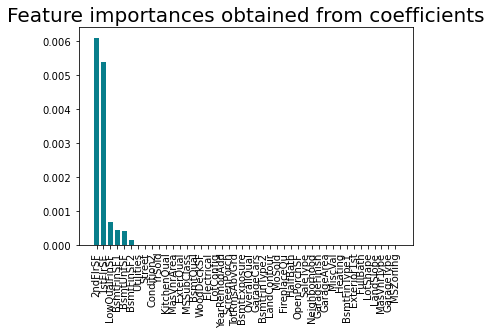

In [56]:
plt.bar(x=big['Attribute'], height=big['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
final_df = std_df[big.iloc[1:36, 0]]
final_df

,1stFlrSF,LowQualFinSF,BsmtFinSF1,BsmtUnfSF,BsmtFinSF2,Utilities,Street,Condition2,YrSold,KitchenQual,...,MoSold,FireplaceQu,HalfBath,OpenPorchSF,SaleType,Neighborhood,GarageFinish,GarageArea,MiscVal,Heating
0,-0.793146,-0.120577,0.580026,-0.943747,-0.289513,0.0,1.0,2.0,0.138937,2.0,...,-1.600089,2.0,1.230784,0.221269,8.0,5.0,1.0,0.352866,-0.087931,1.0
1,0.261712,-0.120577,1.177561,-0.640532,-0.289513,0.0,1.0,2.0,-0.613809,3.0,...,-0.488448,4.0,-0.759303,-0.702611,8.0,24.0,1.0,-0.058286,-0.087931,1.0
2,-0.626863,-0.120577,0.096725,-0.301113,-0.289513,0.0,1.0,2.0,0.138937,2.0,...,0.993739,4.0,1.230784,-0.066497,8.0,5.0,1.0,0.633197,-0.087931,1.0
3,-0.520338,-0.120577,-0.496416,-0.061256,-0.289513,0.0,1.0,2.0,-1.366555,2.0,...,-1.600089,2.0,-0.759303,-0.172516,8.0,6.0,2.0,0.792051,-0.087931,1.0
4,-0.042274,-0.120577,0.467988,-0.174396,-0.289513,0.0,1.0,2.0,0.138937,2.0,...,2.105380,4.0,1.230784,0.569618,8.0,15.0,1.0,1.698455,-0.087931,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,-0.541123,-0.120577,-0.970929,0.873280,-0.289513,0.0,1.0,2.0,-0.613809,3.0,...,0.623192,4.0,1.230784,-0.096788,8.0,8.0,1.0,-0.058286,-0.087931,1.0
1448,2.368831,-0.120577,0.764558,0.049621,0.718710,0.0,1.0,2.0,1.644429,3.0,...,-1.600089,4.0,-0.759303,-0.702611,8.0,14.0,2.0,0.128601,-0.087931,1.0
1449,0.069447,-0.120577,-0.366804,0.701307,-0.289513,0.0,1.0,2.0,1.644429,2.0,...,-0.488448,2.0,-0.759303,0.206124,8.0,6.0,1.0,-1.030101,4.939146,1.0
1450,-0.216352,-0.120577,-0.863285,-1.283167,6.075283,0.0,1.0,2.0,1.644429,2.0,...,-0.858995,2.0,-0.759303,-0.702611,8.0,12.0,2.0,-1.086167,-0.087931,1.0


### Training on all Features

In [58]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


rmse_val = []
for K in range(3,40,2):
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  3 is: 0.4538191157438534
RMSE value for k=  5 is: 0.43593322171979015
RMSE value for k=  7 is: 0.4399030509091404
RMSE value for k=  9 is: 0.44691686507800515
RMSE value for k=  11 is: 0.4496681161296561
RMSE value for k=  13 is: 0.45807987471822703
RMSE value for k=  15 is: 0.460243289001151
RMSE value for k=  17 is: 0.4633721463767848
RMSE value for k=  19 is: 0.46619249321628037
RMSE value for k=  21 is: 0.4725877748733125
RMSE value for k=  23 is: 0.47857140934040376
RMSE value for k=  25 is: 0.4848121703723553
RMSE value for k=  27 is: 0.490312905904822
RMSE value for k=  29 is: 0.49441824669650425
RMSE value for k=  31 is: 0.4992075919488821
RMSE value for k=  33 is: 0.5026797406080911
RMSE value for k=  35 is: 0.5053246844328239
RMSE value for k=  37 is: 0.5081462029325371
RMSE value for k=  39 is: 0.5117793958306357


### Training on Selected Features

In [59]:
final_X= final_df
final_y = pd.DataFrame(data=std_df['SalePrice'])
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(final_X, final_y, test_size=0.3, random_state=42)
rmse_val = []
for K in range(3,60,2):
    
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(final_X_train, final_y_train)
    pred=model.predict(final_X_test)
    error = sqrt(mean_squared_error(final_y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  3 is: 0.5100277737353752
RMSE value for k=  5 is: 0.4871392250564344
RMSE value for k=  7 is: 0.48004811124625163
RMSE value for k=  9 is: 0.47834647214851783
RMSE value for k=  11 is: 0.478896418406041
RMSE value for k=  13 is: 0.4865889369101526
RMSE value for k=  15 is: 0.4841820839224622
RMSE value for k=  17 is: 0.47887494485616017
RMSE value for k=  19 is: 0.47769243873386863
RMSE value for k=  21 is: 0.4813264736277077
RMSE value for k=  23 is: 0.4813676889752155
RMSE value for k=  25 is: 0.48413718709906733
RMSE value for k=  27 is: 0.4834684494262312
RMSE value for k=  29 is: 0.48519093109905764
RMSE value for k=  31 is: 0.48478303357945157
RMSE value for k=  33 is: 0.4908702572415809
RMSE value for k=  35 is: 0.49619472786629026
RMSE value for k=  37 is: 0.49763012188536987
RMSE value for k=  39 is: 0.5000302393815639
RMSE value for k=  41 is: 0.503342030444315
RMSE value for k=  43 is: 0.5060704083706232
RMSE value for k=  45 is: 0.5088535678816287
RMSE va

In [60]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)

model.fit(final_X_train, final_y_train)
pred=model.predict(final_X_test)
error = sqrt(mean_squared_error(final_y_test,pred))
rmse_val.append(error)
print('RMSE value for k= 19' , K , 'is:', error)

RMSE value for k= 19 59 is: 0.47769243873386863


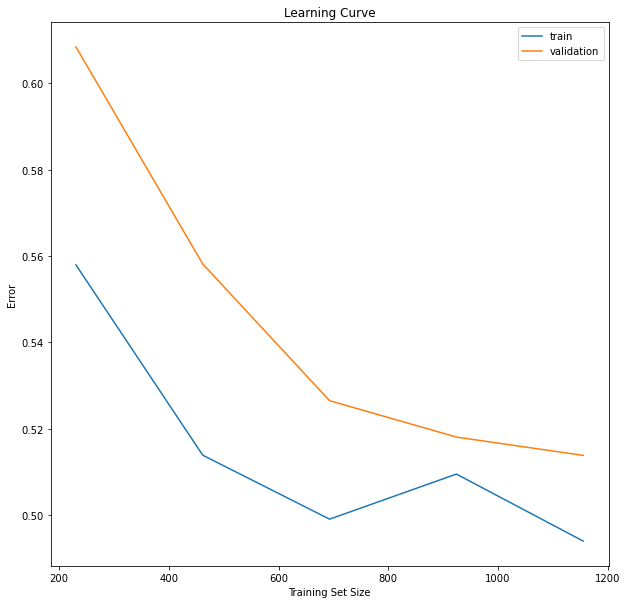

In [61]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=final_X,
    y=final_y.values.ravel(),
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

## Decision Trees
### Training with all features

In [62]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
max_depth =  [1,3,5,7,9,11,12]
for d in max_depth:
    regressor = DecisionTreeRegressor(random_state = 42, max_depth = d) 
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print('Root Mean Squared Error for depth',d,":", np.sqrt(metrics.mean_squared_error(y_test, y_pred, squared=False)))

Root Mean Squared Error for depth 1 : 0.7680556341461229
Root Mean Squared Error for depth 3 : 0.43350807466553787
Root Mean Squared Error for depth 5 : 0.2784916620848304
Root Mean Squared Error for depth 7 : 0.18074134947058837
Root Mean Squared Error for depth 9 : 0.3885836174192316
Root Mean Squared Error for depth 11 : 0.17712958511722723
Root Mean Squared Error for depth 12 : 0.24916858909384512


### Training with Selected Features

In [63]:
max_depth =  [1,3,5,7,9,11,12]
for d in max_depth:
    regressor = DecisionTreeRegressor(random_state = 42, max_depth = d) 
    regressor.fit(final_X_train, final_y_train)
    y_pred = regressor.predict(final_X_test)
    print('Root Mean Squared Error for depth',d,":", np.sqrt(metrics.mean_squared_error(final_y_test, y_pred, squared=False)))

Root Mean Squared Error for depth 1 : 0.8538502332015745
Root Mean Squared Error for depth 3 : 0.7397250118921177
Root Mean Squared Error for depth 5 : 0.6951467614452004
Root Mean Squared Error for depth 7 : 0.7047229675722988
Root Mean Squared Error for depth 9 : 0.7213458566015122
Root Mean Squared Error for depth 11 : 0.7247253677223898
Root Mean Squared Error for depth 12 : 0.7358261371189185


## Linear Regression
### Training with All Features

In [78]:
intercept = [True, False]
for i in intercept:
    reg = linear_model.LinearRegression(fit_intercept = i)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print('Error when intercept is',i,":", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error when intercept is True : 1.7639269884663775e-15
Error when intercept is False : 2.8731573435546495e-15


### Training With Top Features

In [79]:
intercept = [True, False]
for i in intercept:
    reg = linear_model.LinearRegression(fit_intercept = i)
    reg.fit(final_X_train, final_y_train)
    y_pred = reg.predict(final_X_test)
    print('Error when intercept is',i,":", np.sqrt(metrics.mean_squared_error(final_y_test, y_pred)))



Error when intercept is True : 0.4075729705419723
Error when intercept is False : 0.41023533737406853
